# Normalization and Standardization

Why transformation of features are required?

1. Liner Regression -- Gradient Descent -- Global minima
2. Algorithms like KNN, k means, Hierarichal clustering --- Eucledian Distance

deep learning Techniques (Standardization, Scaling ) -- 0-255 pixels

1. ANN -- Global Minima, Gradient
2. CNN
3. RNN


Techniques: Types of transformation
1. Normalization and Standardization -- Standardscaler
2. Scaling to Minimum and Maximum values -- MINMAXSCALER
3. Scaling to Median and Quantiles -- RobustScaler
4. Gaussian Transformation
5. Logaritmic Transformation
6. Reciprocal Transformation
7. Square Root Transformation
8. Exponential Transformation
9. Box Cox Transformation

### Standardization -- for normal distribution
we try to bring all the variables or features to a similar scale. Standardization means centering the variable at zero

z=(x-x_mean)/std

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Titanic_train.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df['Age'].fillna(df.Age.mean(),inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [8]:
#### standardisation: we use the standartscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [9]:
# creating the object

scaler=StandardScaler()

In [10]:
### fit vs fit_transform

df_scaled=scaler.fit_transform(df)
df_scaled

array([[-0.78927234,  0.82737724, -0.5924806 , -0.50244517],
       [ 1.2669898 , -1.56610693,  0.63878901,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.2846632 , -0.48885426],
       ...,
       [-0.78927234,  0.82737724,  0.        , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.2846632 , -0.04438104],
       [-0.78927234,  0.82737724,  0.17706291, -0.49237783]])

In [11]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.592481,-0.502445
1,1.266990,-1.566107,0.638789,0.786845
2,1.266990,0.827377,-0.284663,-0.488854
3,1.266990,-1.566107,0.407926,0.420730
4,-0.789272,0.827377,0.407926,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.207709,-0.386671
887,1.266990,-1.566107,-0.823344,-0.044381
888,-0.789272,0.827377,0.000000,-0.176263
889,1.266990,-1.566107,-0.284663,-0.044381


In [12]:
## this transform happan feature wise
# like takes mean for the feature then std for that feature

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

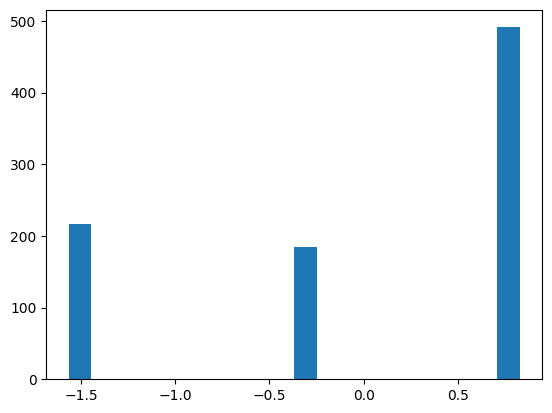

In [14]:
# for pclass
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.25315549, -1.94695413, -1.64075277, -1.3345514 , -1.02835004,
        -0.72214868, -0.41594732, -0.10974596,  0.1964554 ,  0.50265677,
         0.80885813,  1.11505949,  1.42126085,  1.72746221,  2.03366357,
         2.33986494,  2.6460663 ,  2.95226766,  3.25846902,  3.56467038,
         3.87087174]),
 <BarContainer object of 20 artists>)

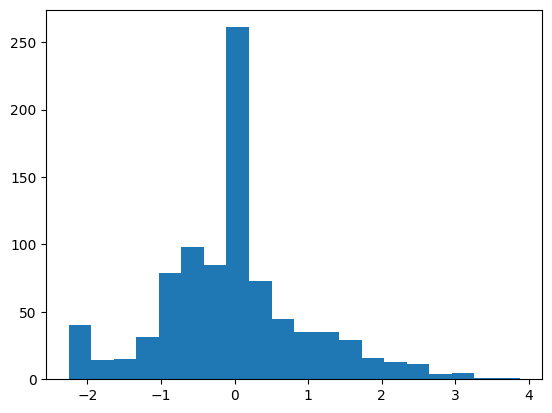

In [16]:
# for Age
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

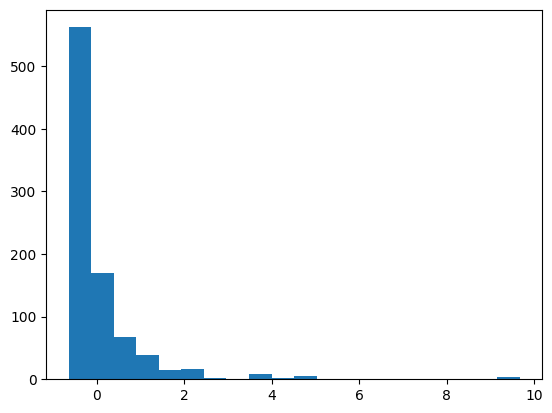

In [17]:
# for fare
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

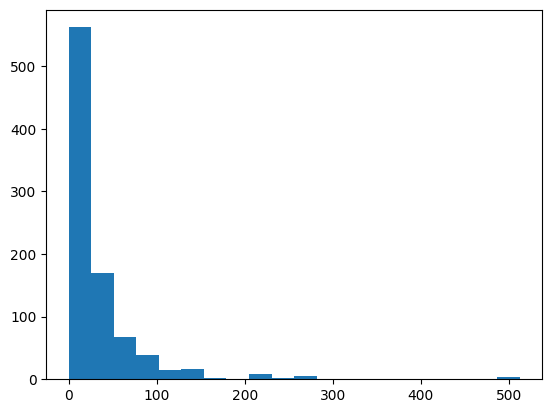

In [21]:
# for fare
plt.hist(df['Fare'],bins=20)

## Min Max Scaling
widely used in deep learning

Main aim:

MinMax Scaling Scales the values between 0 to 1

formula:

X_scaled = (X-X.min / (X.max - X.min)


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# creating object

min_max=MinMaxScaler()

In [24]:
# fit_transform
df_transform=min_max.fit_transform(df)
df_transform

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        , 0.36792055, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [33]:
data=pd.DataFrame(df_transform, columns=df.columns)
data

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.367921,0.045771
889,1.0,0.0,0.321438,0.058556


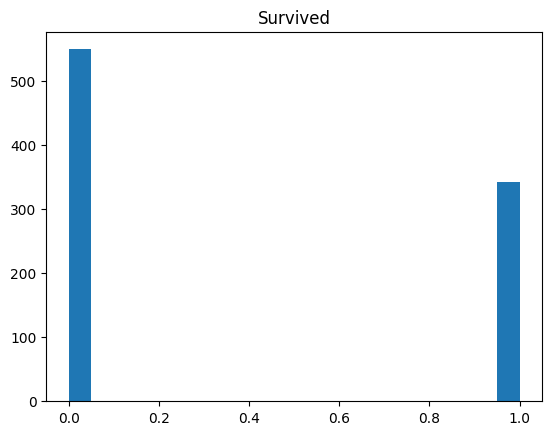

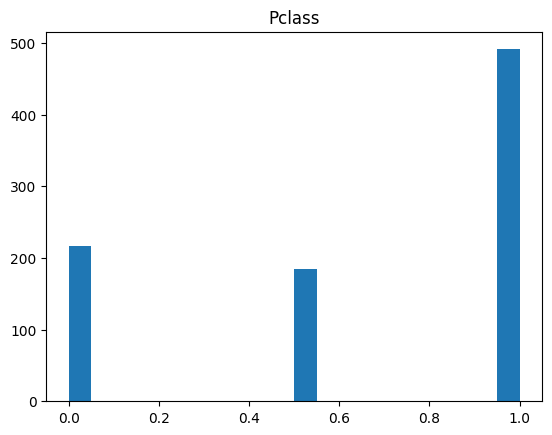

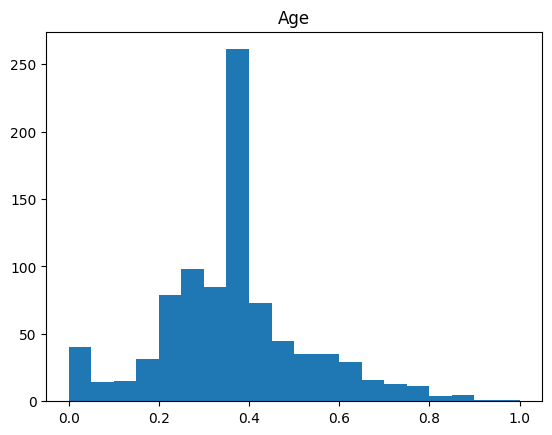

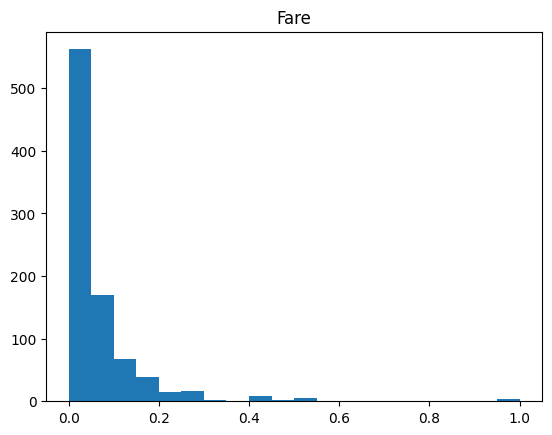

In [36]:
for i in df.columns:
    plt.hist(data[i], bins=20)
    plt.title(i)
    plt.show()

## Robust Scaler
it is used to scale the feature to median and quantiles

Scaling using median and quantiles consists of subtracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between 75th and 25th quantile.

IQR = 75th quantile - 25th quantile

X_scaled=(X - X.median)/IQR

Reason to use:
if the distribution of the variable is skewed 

0,1,2,3,4,5,6,7,8,9,10

9 -- 90TH percentile -- 90% of all values in this qroup is less than 9


4 -- 40th percentile -- 40% of all values in this group is less than 4

In [38]:
from sklearn.preprocessing import RobustScaler

In [39]:
# create an object

robust=RobustScaler()

In [41]:
# fit tranform

fit=robust.fit_transform(df)
fit

array([[ 0.        ,  0.        , -0.59223982, -0.3120106 ],
       [ 1.        , -2.        ,  0.63852941,  2.46124229],
       [ 1.        ,  0.        , -0.28454751, -0.28277666],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.38960398],
       [ 1.        , -2.        , -0.28454751,  0.67328148],
       [ 0.        ,  0.        ,  0.17699095, -0.29035583]])

In [44]:
# creating dataframe

data=pd.DataFrame(fit,columns=df.columns)
data

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.592240,-0.312011
1,1.0,-2.0,0.638529,2.461242
2,1.0,0.0,-0.284548,-0.282777
3,1.0,-2.0,0.407760,1.673732
4,0.0,0.0,0.407760,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.207624,-0.062981
887,1.0,-2.0,-0.823009,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.284548,0.673281


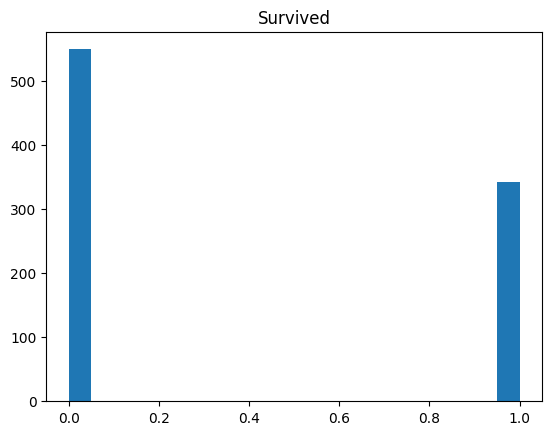

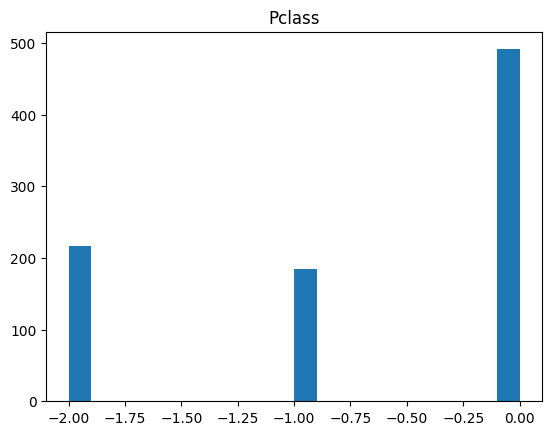

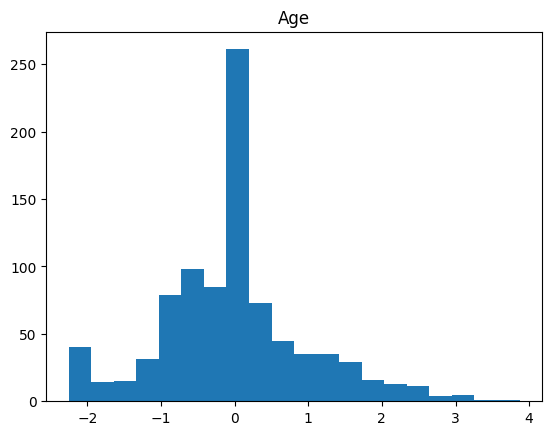

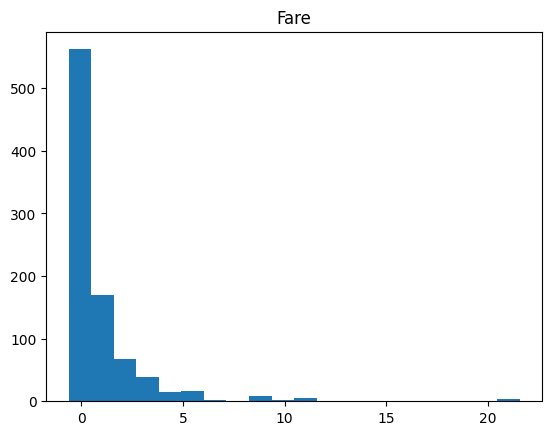

In [45]:
# ploting hist

for i in df.columns:
    plt.hist(data[i], bins=20)
    plt.title(i)
    plt.show()

## Gaussian Tranformation

Some machine learning algorithms like linear and logistic assume that features are normally distributed -Accuracy -performance


- Logaritmic Transformation
- Reciprocal Transformation
- Square Root Transformation
- Exponential Transformation
- Box Cox Transformation

In [46]:
df=pd.read_csv('Titanic_train.csv', usecols=['Pclass','Age','Fare','Survived'])

In [47]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [48]:
### fill nan
df['Age'].fillna(df["Age"].median(),inplace=True)

In [49]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [50]:
import scipy.stats as stat
import pylab

In [53]:
## if u want to check whether feature is guassian or normal distributed
#### Q-Q PLOT

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

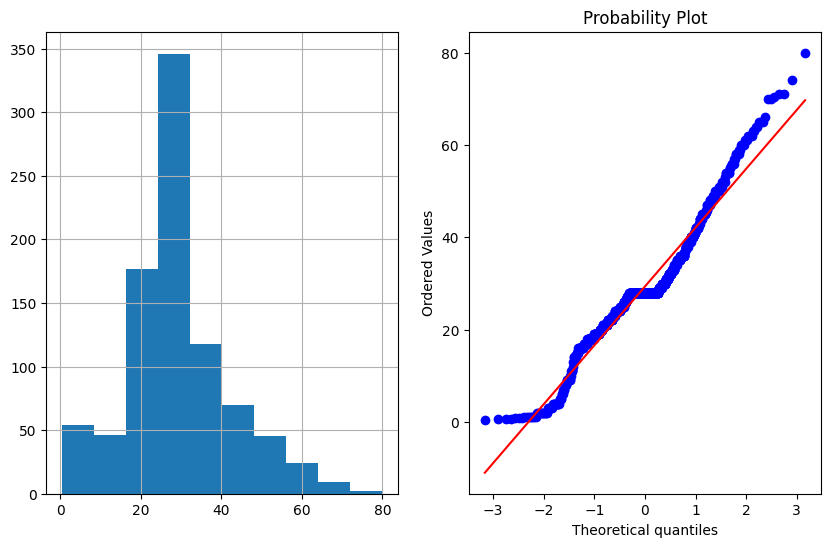

In [54]:
plot_data(df,'Age')

#### Logrithmic transformation
best for right skewed

In [57]:
import numpy as np


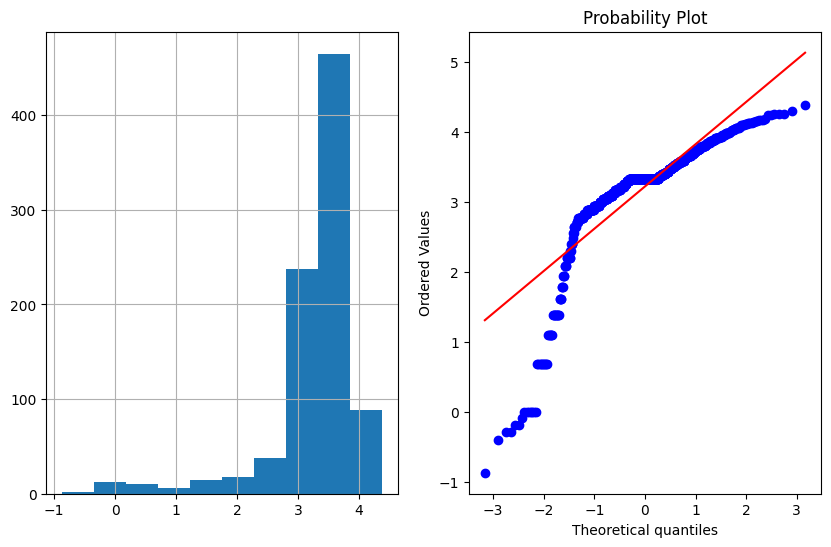

In [59]:
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

the points are not in the line so logrithmic transformation wont work for Age

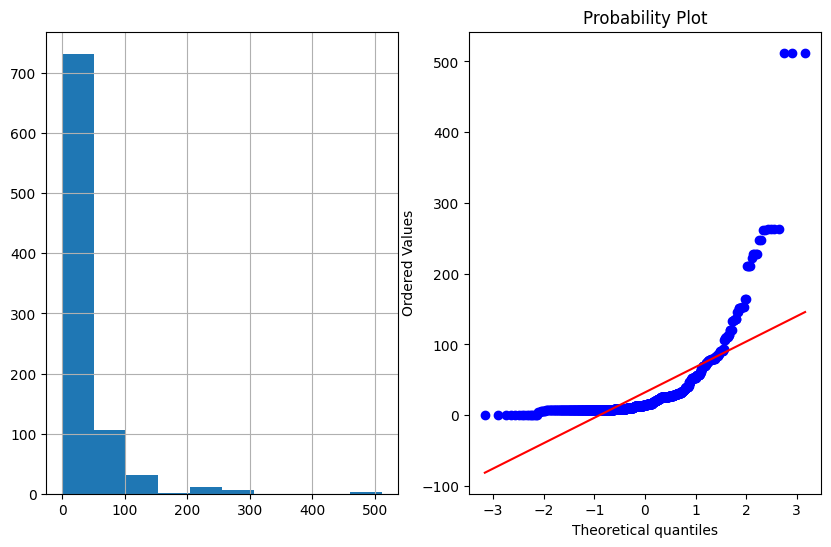

In [60]:
## for fare variable using logrithmic

plot_data(df,'Fare')

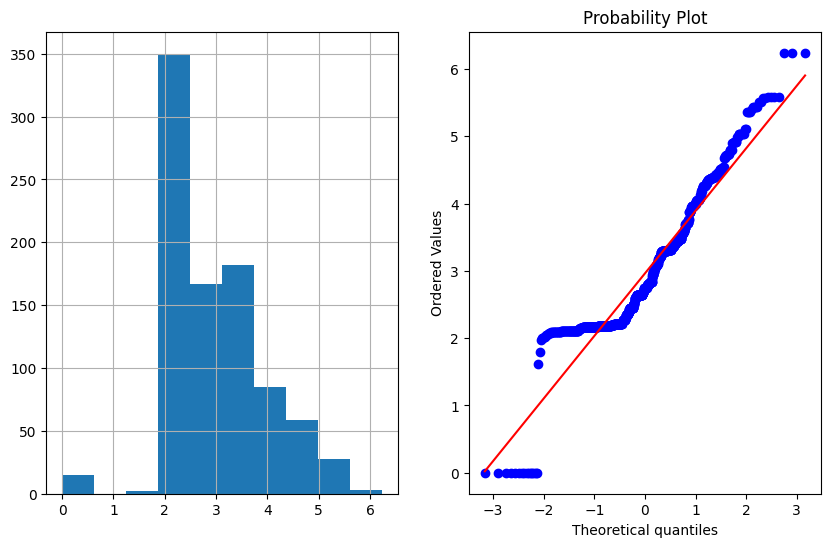

In [73]:
### using log in fare

df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

## in using np.log() is it giving error because Fare has value 0 so we use np.log1p()

#### Reciprocal Transformation

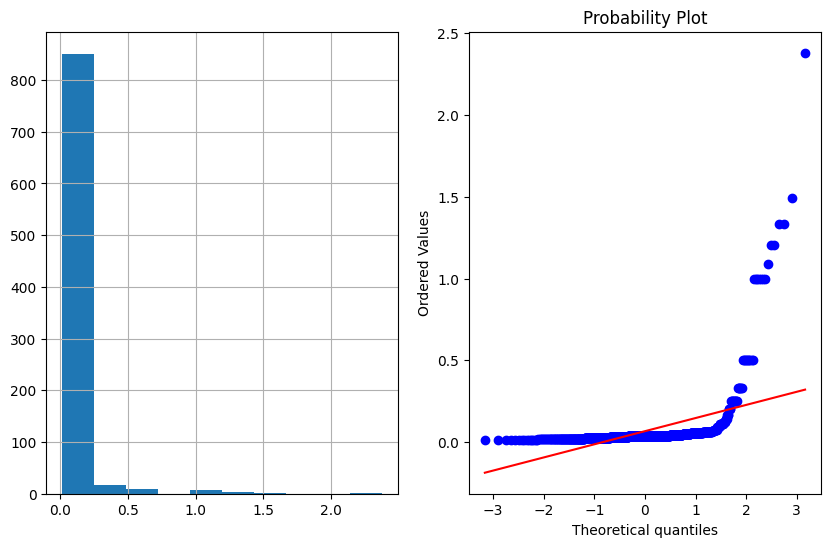

In [64]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

reciprocal transformation is also not working

#### square root Transformation

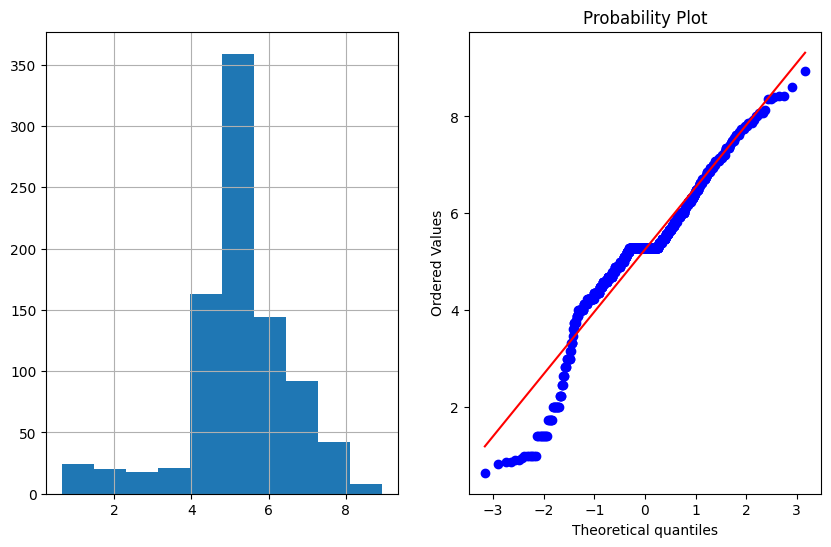

In [66]:
df['Age_square']=df.Age**(1/2)
plot_data(df,'Age_square')

#### Exponential Transformation

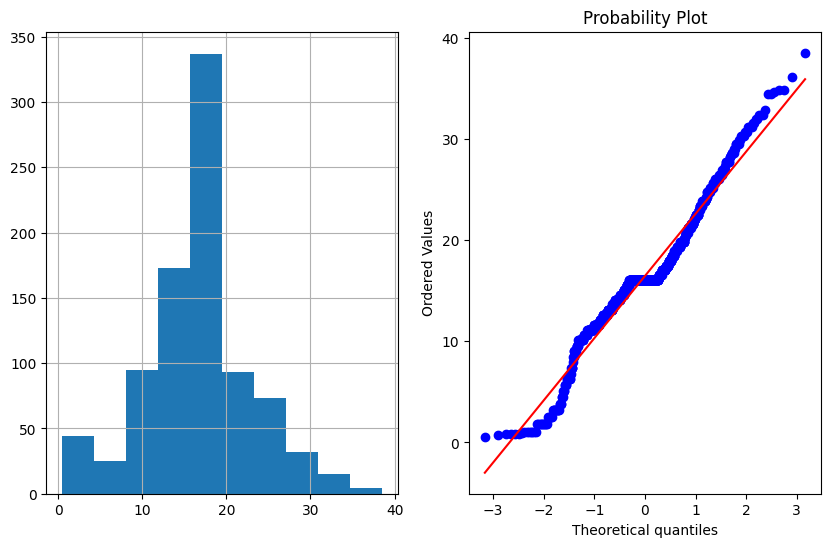

In [67]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### Box Cox transformation

the Box-Cox transformation is defined as:

t(y)=(y exp(lamda)-1)/lambda

where y is the response variable and lambda is the transformation parameter. lambda varies from -5 to 5. In the transformation, all values of lambda are considered and the optimal value for a given variable is selected

In [70]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [71]:
print(parameters)

0.7964531473656952


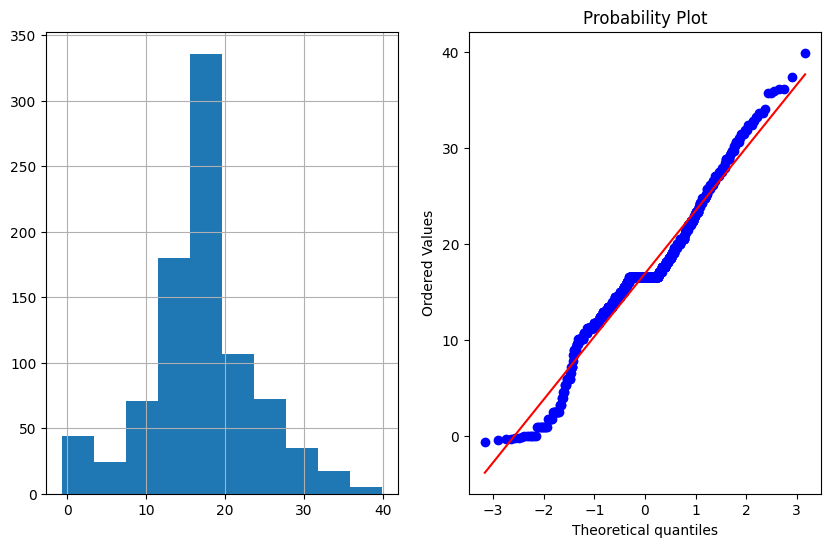

In [72]:
plot_data(df,'Age_Boxcox')